## Clustering Algorithms


*   Supervised learning requires you to have labels for each sample. 
*   What happens when we don't have labels and just the data.
*   We could try grouping together similar data to find patterns in data. --> This is where clustering comes in.





### K-means clustering


Let's say we have 10 data points, which in actuality are 5 men and 5 women, (but we don't know this) and we want to divide them into 2 groups (ie. divide by gender). 


*  We select 2 random data points as the centroids of the 2 clusters we desire.
*  Group each point into cluster 1 or cluster 2 based on **proximity** to selected centroid.
*   Recalculate the centroids for these clusters. 
*   Repeat the process till dist between new and old centroid is very small or zero.


We now do the same for the iris dataset.. 




### Import the required.. 

In [0]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from pandas import DataFrame
%matplotlib inline

### Load iris dataset

In [0]:
print(__doc__)

import numpy as np
from sklearn import datasets

np.random.seed(5)

iris = datasets.load_iris()
X = iris.data
y = iris.target

Automatically created module for IPython interactive environment


### K means : 

/usr/local/lib/python2.7/dist-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


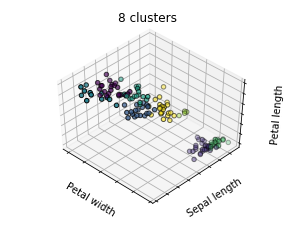

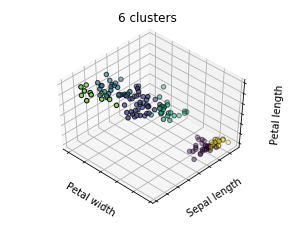

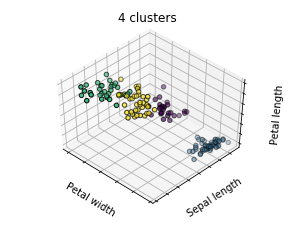

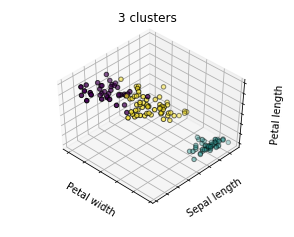

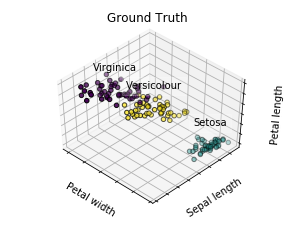

In [0]:
from sklearn.cluster import KMeans
estimators = [('k_means_iris_8', KMeans(n_clusters=8)),
              ('k_means_iris_6', KMeans(n_clusters=6)),
             ('k_means_iris_4', KMeans(n_clusters=4)),
             ('k_means_iris_3', KMeans(n_clusters=3))]

fignum = 1
titles = ['8 clusters', '6 clusters', '4 clusters', '3 clusters']
for name, est in estimators:
    fig = plt.figure(fignum, figsize=(4, 3))
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
    est.fit(X)
    labels = est.labels_

    ax.scatter(X[:, 3], X[:, 0], X[:, 2],
               c=labels.astype(np.float), edgecolor='k')

    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_xlabel('Petal width')
    ax.set_ylabel('Sepal length')
    ax.set_zlabel('Petal length')
    ax.set_title(titles[fignum - 1])
    ax.dist = 12
    fignum = fignum + 1

# Plot the ground truth
fig = plt.figure(fignum, figsize=(4, 3))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

for name, label in [('Setosa', 0),
                    ('Versicolour', 1),
                    ('Virginica', 2)]:
    ax.text3D(X[y == label, 3].mean(),
              X[y == label, 0].mean(),
              X[y == label, 2].mean() + 2, name,
              horizontalalignment='center',
              bbox=dict(alpha=.2, edgecolor='w', facecolor='w'))
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=y, edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Petal width')
ax.set_ylabel('Sepal length')
ax.set_zlabel('Petal length')
ax.set_title('Ground Truth')
ax.dist = 12

fig.show()

### Probs with K means: 


*   Choosing number of clusters
*   Time consuming in higher dimensions
*   Takes time to converge




### DBSCAN ( Density-based spatial clustering of applications with noise )
It uses two paramteres : 
* eps : if the distance between two points <= eps then they are considered neighbors
* min_samples : the minimum number of points to form a dense region. For example, if we set it as 5, then we need at least 5 points to form a dense region.

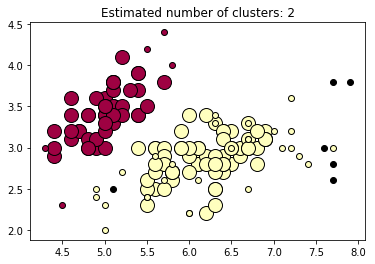

In [0]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn import datasets

db = DBSCAN(eps = 1, min_samples = 30).fit(X)


core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = 'k'
    class_member_mask = (labels == k)
    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)
    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=6)
plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()


### Probs with Dbscan: 


*   For non-uniformly dense data, DBSCAN may fail
*   For higher dimensions, computationally very heavy.

